# "Базовые понятия статистики"

## Обязательная часть
Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики.

### Задание 1. Базовое изучение
Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.
### Задание 2. Работа с выбросами
В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.
### Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.


In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv',
                names=['surgery', 
                       'age', 
                       'hospitalNumber', 
                       'rectalTemperature', 
                       'pulse', 
                       'respiratoryRate', 
                       'temperatureExtremities',
                       'peripheralPulse',
                       'mucousMembranes',
                       'capillaryRefillTime',
                       'pain',
                       'peristalsis',
                       'abdominalDistension',
                       'nasogastricTube',
                       'nasogastricReflux',
                       'nasogastricRefluxPH',
                       'rectalExamination',
                       'abdomen',
                       'packedCellVolume',
                       'totalProtein',
                       'abdominocentesisAppearance',
                       'abdomcentesisTotalProtein',
                       'outcome',
                       'surgicalLesion',
                       'typeLesion1',
                       'typeLesion2',
                       'typeLesion3',
                       'cp_data'
                      ])
df

,surgery,age,hospitalNumber,rectalTemperature,pulse,respiratoryRate,temperatureExtremities,peripheralPulse,mucousMembranes,capillaryRefillTime,...,packedCellVolume,totalProtein,abdominocentesisAppearance,abdomcentesisTotalProtein,outcome,surgicalLesion,typeLesion1,typeLesion2,typeLesion3,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,?,120,70,4,?,4,2,...,55,65,?,?,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,?,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,?,?,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


# Атрибут surgery

Проверим какие значения есть

In [12]:
df.surgery.value_counts()

1    180
2    119
?      1
Name: surgery, dtype: int64

Есть одно неизвестное значение. Пропустим его, т.к. сильно не повлияет на результат.

# Атрибут age

Проверим какие значения есть

In [13]:
df.age.value_counts()

1    276
9     24
Name: age, dtype: int64

Есть значение 9, которое отсутствует в документации. Скорее всего это ошибка документации. Сделаем предположение, что 9 - это молодые лошади.

# Атрибут rectalTemperature

Есть 20% неизвестных значений. Заменим их на NaN, чтобы они не влияли на показатели.
Поменяем тип на числовой.

In [104]:
df[df.rectalTemperature == '?'].rectalTemperature.count()/df.rectalTemperature.count()

0.2

In [105]:
df.loc[df.rectalTemperature == '?', 'rectalTemperature'] = np.nan
df.rectalTemperature = df.rectalTemperature.astype(float)

In [106]:
df.rectalTemperature.describe()

count    240.000000
mean      38.167917
std        0.732289
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectalTemperature, dtype: float64

Визуализируем показатель:

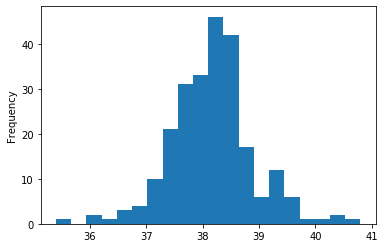

In [85]:
df.rectalTemperature.plot(kind='hist', bins=20)

Распределение выглядит нормальным

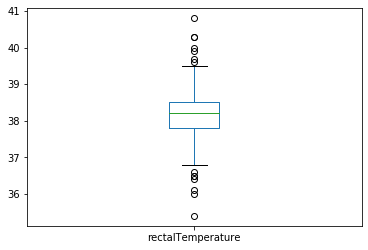

In [86]:
df.rectalTemperature.plot(kind='box')

Есть выбросы с низкой и высокой температурой. Проверим кто это:

In [92]:
df[(df.rectalTemperature < 37) | (df.rectalTemperature > 39.5)]

,surgery,age,hospitalNumber,rectalTemperature,pulse,respiratoryRate,temperatureExtremities,peripheralPulse,mucousMembranes,capillaryRefillTime,...,packedCellVolume,totalProtein,abdominocentesisAppearance,abdomcentesisTotalProtein,outcome,surgicalLesion,typeLesion1,typeLesion2,typeLesion3,cp_data
20,1,1,530157,39.9,72.0,60,1,1,5,2,...,46.00,6.10,2,?,1,1,2111,0,0,2
44,1,1,535407,35.4,140.0,24,3,3,4,2,...,57,69,3,2,3,1,3205,0,0,2
54,2,1,529461,40.3,114.0,36,3,3,1,2,...,57.00,8.10,3,4.50,3,1,7400,0,0,1
75,1,9,534092,39.7,100.0,?,3,3,5,2,...,48,57,2,2,3,1,1400,0,0,2
80,1,1,527518,36.4,98.0,35,3,3,4,1,...,47.00,6.40,3,3.60,2,1,2205,0,0,1
91,2,1,529461,40.3,114.0,36,3,3,1,2,...,57.00,8.10,3,4.50,2,1,3205,0,0,1
99,2,1,530002,39.6,108.0,51,3,3,6,2,...,59.00,8.00,2,2.60,1,2,4300,0,0,1
113,1,1,527933,36.8,60.0,28,?,?,?,?,...,?,?,?,10.00,2,1,3205,0,0,1
118,1,1,533983,36.5,78.0,30,1,?,1,1,...,34,75,2,1,1,1,3112,6112,0,2
141,2,1,522979,36.0,42.0,30,?,?,5,1,...,64.00,6.80,?,?,2,2,1400,0,0,2


Большинство из этих лошадей умерли или были усыплены. Считаем, что эти выбросы нормальные.

# Атрибут pulse
Есть 2% неизвестных значения. Заменим их на NaN, чтобы они не влияли на показатели. Поменяем тип на числовой.

In [107]:
df[df.pulse == '?'].rectalTemperature.count()/df.pulse.count()

0.02

In [108]:
df.loc[df.pulse == '?', 'pulse'] = np.nan
df.pulse = df.pulse.astype(float)

In [109]:
df.pulse.describe()

count    276.000000
mean      71.913043
std       28.630557
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64

Есть очень высокие значения. Нужно их проверить.

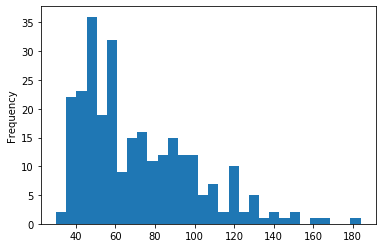

In [74]:
df.pulse.plot(kind='hist', bins=30)

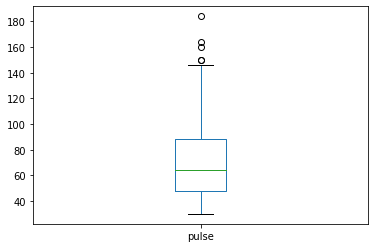

In [75]:
df.pulse.plot(kind='box')

Пульс больше 140 выглядит как выброс. Проверим у кого такие пульсы.

In [76]:
df[df.pulse > 140]

,surgery,age,hospitalNumber,rectalTemperature,pulse,respiratoryRate,temperatureExtremities,peripheralPulse,mucousMembranes,capillaryRefillTime,...,packedCellVolume,totalProtein,abdominocentesisAppearance,abdomcentesisTotalProtein,outcome,surgicalLesion,typeLesion1,typeLesion2,typeLesion3,cp_data
3,1,9,5290409,39.10,164.0,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
39,1,9,5277409,39.20,146.0,96,?,?,?,?,...,?,?,?,?,2,1,2113,0,0,2
41,2,9,5288249,39.00,150.0,72,?,?,?,?,...,47.00,8.50,?,0.10,1,1,9400,0,0,1
55,1,9,5282839,38.60,160.0,20,3,?,5,1,...,38.00,?,2,?,2,1,7111,0,0,1
255,1,9,5294539,38.80,184.0,84,1,?,1,1,...,33.00,3.30,?,?,2,1,7111,0,0,2
275,1,9,5297159,38.80,150.0,50,1,3,6,2,...,50.00,6.20,?,?,2,1,4207,0,0,2


Это всё молодые лошади, большинство из которых в итоге умерли. Посмотрим статистику по молодым и старым лошадям раздельно.

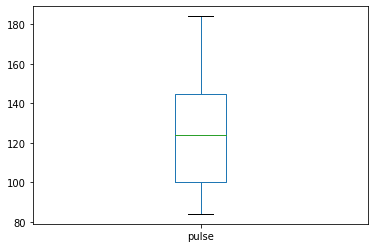

In [81]:
df[df.age == 9].pulse.plot(kind='box')

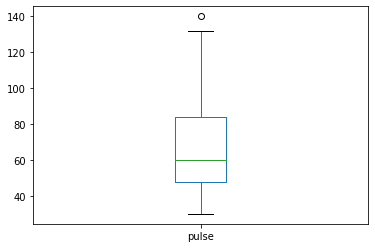

In [82]:
df[df.age == 1].pulse.plot(kind='box')

Действительно у старых лошадей пульс в целом ниже. Так что высокие пульсы считаем нормальными выбросами.

# Атрибут outcome

In [94]:
df.outcome.value_counts()

1    178
2     77
3     44
?      1
Name: outcome, dtype: int64

Есть одно неизвестное значение. Пропустим его, т.к. сильно не повлияет на результат.